In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [2]:
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [3]:
# freeze only the initial layers and allow the rest to be trainable
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

In this case, we're using a global average pooling layer to reduce the dimensionality of the output of the base model to a single vector of 128 dimensions. We then add a dense layer with 128 neurons and ReLU activation. Finally, we add a dense layer with 2 neurons and softmax activation, which will produce the probability distribution over the dog and cat classes.

In [4]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
predictions = tf.keras.layers.Dense(12, activation='softmax')(x)

In [5]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

valid_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory('C:/Users/Ka Long/Desktop/Plantdata/Training', 
                                                      target_size=(224, 224), 
                                                      batch_size=32, 
                                                      class_mode='categorical', 
                                                      classes=['Lavender', 'Coleus', 'Lagerstroemia Lipan', 'Cantaurea', 'Lucky Nut', 
                                                               'Aloe Cameronii', 'Aloe Maculata', 'Camellia', 'Dracaena Draco', 
                                                               'Hibiscus', 'Salvia', 'Sandburs'])

valid_generator = valid_data_gen.flow_from_directory('C:/Users/Ka Long/Desktop/Plantdata/Testing', 
                                                      target_size=(224, 224), 
                                                      batch_size=32, 
                                                      class_mode='categorical', 
                                                      classes=['Lavender', 'Coleus', 'Lagerstroemia Lipan', 'Cantaurea', 'Lucky Nut', 
                                                               'Aloe Cameronii', 'Aloe Maculata', 'Camellia', 'Dracaena Draco', 
                                                               'Hibiscus', 'Salvia', 'Sandburs'])

Found 3577 images belonging to 12 classes.
Found 368 images belonging to 12 classes.


In [8]:
#Utilizing a learning rate scheduler helps in changing the learning rate dynamically during training, which can lead to better convergence.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model.fit(train_generator, validation_data=valid_generator, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
112/112 [==============================] - 225s 2s/step - loss: 2.7267 - accuracy: 0.7000 - val_loss: 1.6563 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - 248s 2s/step - loss: 1.4092 - accuracy: 0.9024 - val_loss: 1.0836 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - 255s 2s/step - loss: 1.0146 - accuracy: 0.9063 - val_loss: 0.8224 - val_accuracy: 0.9266 - lr: 0.0010
Epoch 4/100
112/112 [==============================] - 249s 2s/step - loss: 0.7949 - accuracy: 0.9091 - val_loss: 0.6483 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 5/100
112/112 [==============================] - 249s 2s/step - loss: 0.6441 - accuracy: 0.9256 - val_loss: 0.5067 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - 244s 2s/step - loss: 0.5609 - accuracy: 0.9262 - val_loss: 0.4469 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 7/100
112/112 [==============================] - 242

112/112 [==============================] - 213s 2s/step - loss: 0.2423 - accuracy: 0.9572 - val_loss: 0.2392 - val_accuracy: 0.9429 - lr: 2.0000e-04
Epoch 53/100
112/112 [==============================] - 212s 2s/step - loss: 0.2394 - accuracy: 0.9561 - val_loss: 0.2476 - val_accuracy: 0.9457 - lr: 2.0000e-04
Epoch 54/100
112/112 [==============================] - 213s 2s/step - loss: 0.2305 - accuracy: 0.9606 - val_loss: 0.2206 - val_accuracy: 0.9565 - lr: 4.0000e-05
Epoch 55/100
112/112 [==============================] - 214s 2s/step - loss: 0.2323 - accuracy: 0.9569 - val_loss: 0.2262 - val_accuracy: 0.9429 - lr: 4.0000e-05
Epoch 56/100
112/112 [==============================] - 208s 2s/step - loss: 0.2241 - accuracy: 0.9639 - val_loss: 0.2254 - val_accuracy: 0.9484 - lr: 4.0000e-05
Epoch 57/100
112/112 [==============================] - 209s 2s/step - loss: 0.2193 - accuracy: 0.9614 - val_loss: 0.2165 - val_accuracy: 0.9538 - lr: 4.0000e-05
Epoch 58/100
112/112 [===================

In [15]:
model.save('mobilenet_plant_2.h5')

1/1 [==============================] - 0s 307ms/step
12
5.0117563e-07
2.880521e-06
8.431988e-06
4.653625e-06
0.9253132
0.054438885
0.0034858615
4.9433118e-05
0.016667759
9.117249e-06
Predicted class: Lucky Nut


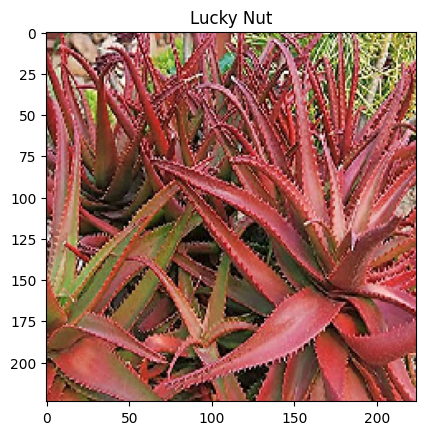

In [34]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np

# Load the saved model
model = load_model('mobilenet_plant_2.h5')

# Load the test image and preprocess it
img_path = 'data/aloe.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict the class of the test image
preds = model.predict(x)
print(preds.size)
for i in range(10):
    print (str(preds[0][i]))
    
# Get the predicted class index
predicted_class_index = np.argmax(preds[0])

# Define a dictionary to map class indices to class names
class_names = {0: 'Lavender', 
               1: 'Coleus', 
               2: 'Lagerstroemia Lipan', 
               3: 'Cantaurea', 
               4: 'Lucky Nut', 
               5: 'Aloe Cameronii',
               6: 'Aloe Maculata',
               7: 'Camellia',
               8: 'Dracaena Draco',
               9: 'Hibiscus',
               10: 'Salvia',
               11: 'Sandburs'}

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print('Predicted class:', predicted_class_name)

# Display the testing image and the predicted class label
plt.imshow(img)
plt.title(predicted_class_name)
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#evaluate your model on unseen data
test_data_gen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)
test_generator = test_data_gen.flow_from_directory(
    'C:/Users/Ka Long/Desktop/Plant Data/Testing',  # Replace with the path to your test dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    class_names = {0: 'Lavender', 
               1: 'Coleus', 
               2: 'Lagerstroemia Lipan', 
               3: 'Cantaurea', 
               4: 'Lucky Nut', 
               5: 'Aloe Cameronii',
               6: 'Aloe Maculata',
               7: 'Camellia',
               8: 'Dracaena Draco',
               9: 'Hibiscus',
               10: 'Salvia',
               11: 'Sandburs'}
)

TypeError: flow_from_directory() got an unexpected keyword argument 'class_names'

In [12]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

ValueError: Asked to retrieve element 0, but the Sequence has length 0